# Extrovert vs introvert ML project

In this project, we explore the personality traits dataset.
The idea is to predict the personality type of an individual given different personality traits.
The available records consist of the following:

    - **Time_spent_Alone**: Hours spent alone daily (0–11).
    - **Stage_fear**: Presence of stage fright (Yes/No).
    - **Social_event_attendance**: Frequency of social events (0–10).
    - **Going_outside**: Frequency of going outside (0–7).
    - **Drained_after_socializing**: Feeling drained after socializing (Yes/No).
    - **Friends_circle_size**: Number of close friends (0–15).
    - **Post_frequency**: Social media post frequency (0–10).
    - **Personality**: Target variable (Extrovert/Introvert).

**Table of contents**
1. Exploratory data analysis
2. Data preprocessing
3. Feature engineering
3. Model training & evaluation

In [100]:
# Import required libraries for modeling
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Libraries for model training and evaluation
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn_lvq import GlvqModel

## 1. Exploratory data analysis

### Data loading & overview

In [101]:
# Import the dataset
data = pd.read_csv('personality_dataset.csv')

# Peek at the first few rows of the dataset
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [102]:
# Shape of the dataset
print("Shape of the dataset:")
print(data.shape)

# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

Shape of the dataset:
(2900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Missing values in each column:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post

In [103]:
# Basic statistics of numerical columns
print("\nBasic statistics:\n", data.describe())


Basic statistics:
        Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                 3.963354       3.000000   
std            3.479192                 2.903827       2.247327   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.000000       3.000000   
75%            8.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2823.000000     2835.000000  
mean              6.268863        3.564727  
std               4.289693        2.926582  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max             

### Univariate exploratory data analysis

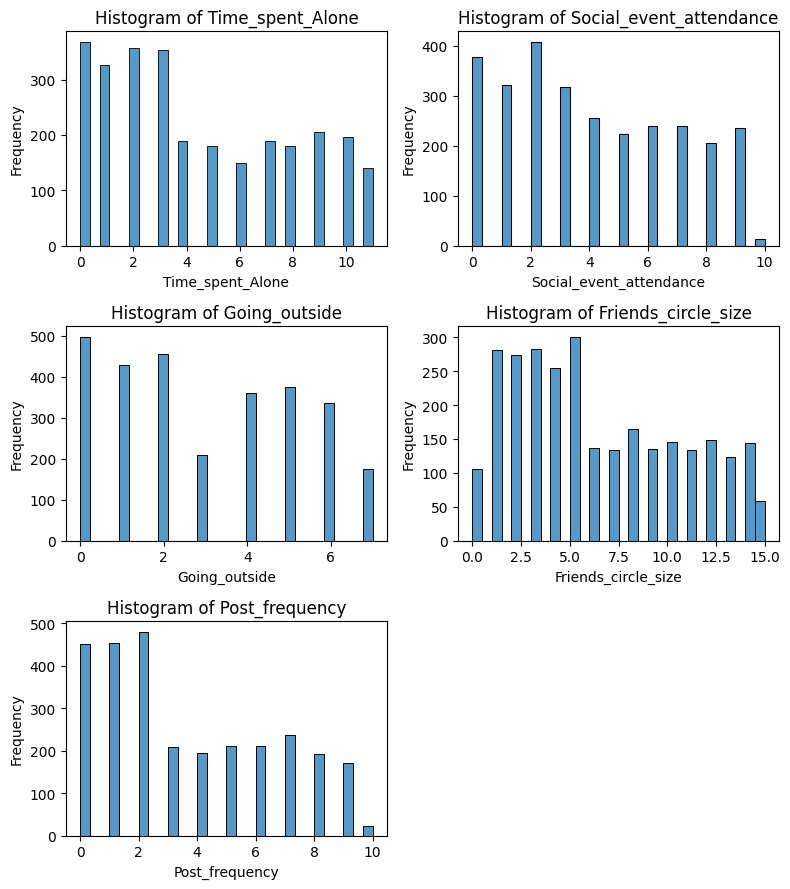

In [104]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
plt.figure(figsize=(8, 9))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col].dropna(), bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.tight_layout()
plt.show()


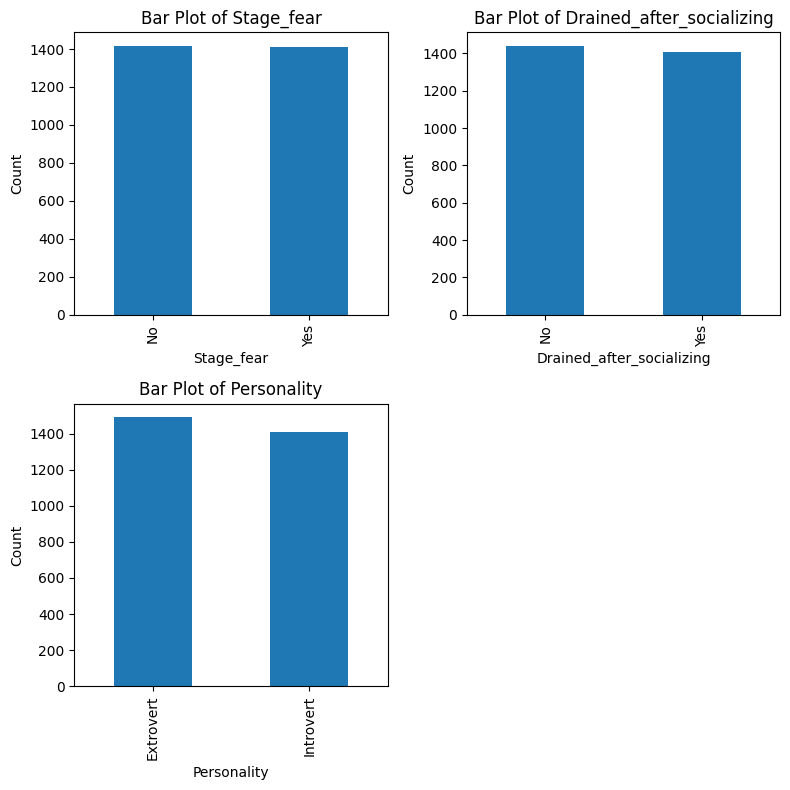

In [105]:

# Select categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Plot bar plots
plt.figure(figsize=(8, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
plt.tight_layout()
plt.show()


### Bivariate exploratory data analysis

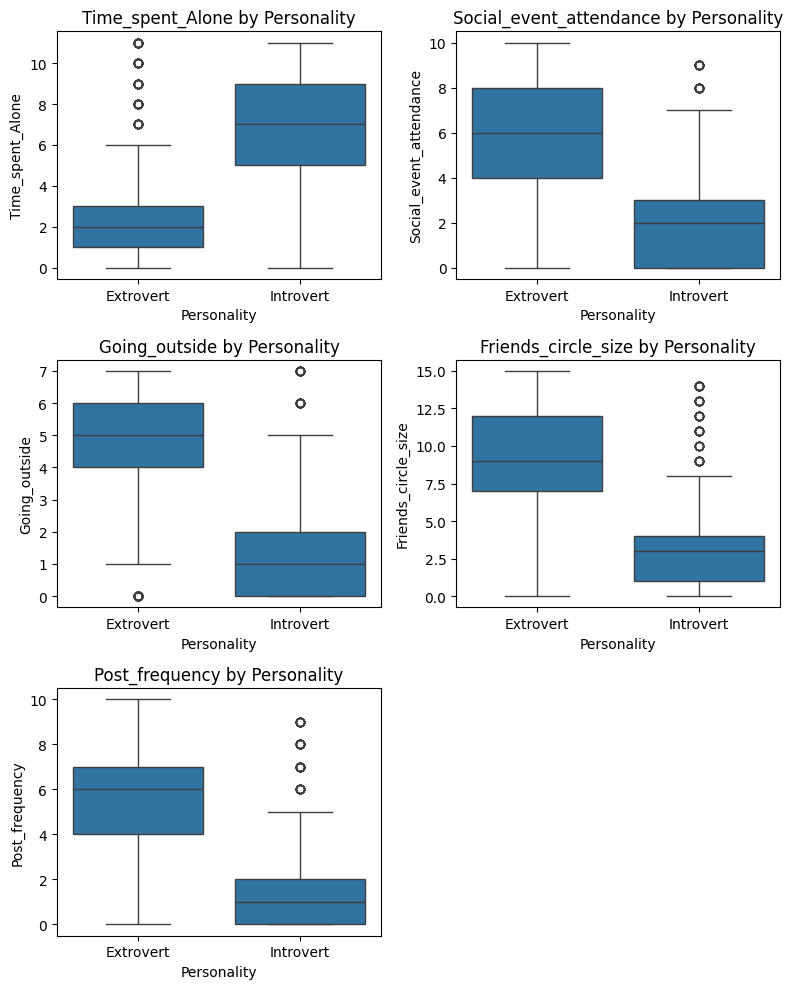

In [106]:
# Numeric feature distributions by class
plt.figure(figsize=(8, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Personality', y=col, data=data)
    plt.title(f'{col} by Personality')
plt.tight_layout()
plt.show()

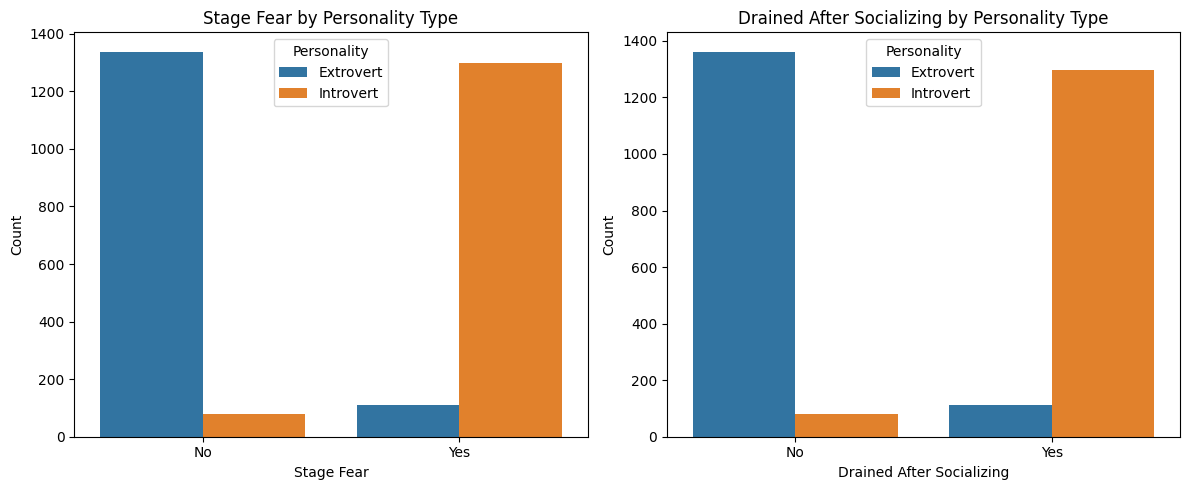

In [107]:
# Bivariate analysis for categorical variables
plt.figure(figsize=(12, 5))

# Stage_fear vs Personality
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Stage_fear', hue='Personality')
plt.title('Stage Fear by Personality Type')
plt.xlabel('Stage Fear')
plt.ylabel('Count')
plt.legend(title='Personality', labels=['Extrovert', 'Introvert'])

# Drained_after_socializing vs Personality  
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Drained_after_socializing', hue='Personality')
plt.title('Drained After Socializing by Personality Type')
plt.xlabel('Drained After Socializing')
plt.ylabel('Count')
plt.legend(title='Personality', labels=['Extrovert', 'Introvert'])

plt.tight_layout()
plt.show()

## 2. Data Preprocessing

### Handling missing values

In [108]:
# Replace missing numerical values with the mean of the column
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

# Delete rows with missing categorical values
data = data.dropna(subset = categorical_cols)

# Print the shape of the dataset after cleaning
print("Shape of the dataset:", data.shape)

Shape of the dataset: (2776, 8)


### Encoding categorical data

In [109]:
# Binary encode the categorical data
for col in categorical_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].map({'Yes': 1, 'No': 0, 'Introvert': 0, 'Extrovert': 1})
        
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


### Deleting outliers using IQR

In [110]:
# Delete outliers using IQR for each numerical column
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
# Print the shape of the dataset after IQR
print("Shape of the dataset after outlier removal:", data.shape)

Shape of the dataset after outlier removal: (2776, 8)


### Splitting the dataset

In [111]:
# Train-test split
X = data.drop(columns=['Personality'])
y = data['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2220, 7)
Test set shape: (556, 7)


## 3. Training & testing different models

The following is a quick description of all the proposed algorithms:
1. **Logistic Regression**: A linear model that predicts probabilities for classification tasks using a logistic function.
2. **Decision Tree**: A tree-based model that splits data into branches to make predictions based on feature values.
3. **Random Forest**: An ensemble of decision trees that improves prediction accuracy by averaging multiple trees.
4. **XGBoost**: A gradient boosting algorithm that builds an ensemble of trees sequentially to optimize performance.
5. **SVM (Support Vector Machine)**: A model that finds the optimal hyperplane to separate classes in feature space.
6. **KNN (K-Nearest Neighbors)**: A non-parametric method that classifies samples based on the majority label among their nearest neighbors.

In [112]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': np.logspace(-4, 4, 20),
            'solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10, 15, 20, 30], 
            'min_samples_split': [2, 5, 10, 15]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 4, 5, 6],
            'subsample': [0.7, 0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': np.logspace(0.1, 1, 10, 100),
                   'kernel': ['rbf'],
                   'gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan', 'minkowski'],
                   'p': [1, 2]  # For minkowski metric
        }
    }
}

### Hyperparameter tuning

In [113]:
# Use RandomizedSearchCV for hyperparameter tuning
results = []
for model_name, model_prop in models.items():
    clf = RandomizedSearchCV(model_prop['model'], model_prop['params'],
                             n_iter=20, cv=3, scoring='f1_weighted',
                             n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [114]:
# Display model performance
print("RandomizedSearchCV Model Tuning Results")
pd.DataFrame(results)

RandomizedSearchCV Model Tuning Results


,model,best_score,best_params
0,Logistic Regression,0.931542,"{'solver': 'liblinear', 'C': 0.615848211066026}"
1,Decision Tree,0.931092,"{'min_samples_split': 15, 'max_depth': 5}"
2,Random Forest,0.931993,"{'n_estimators': 200, 'min_samples_split': 5, ..."
3,XGBoost,0.931544,"{'subsample': 0.7, 'n_estimators': 50, 'max_de..."
4,SVM,0.931544,"{'kernel': 'rbf', 'gamma': 'auto', 'C': 2.5118..."
5,KNN,0.931993,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ..."


### Training & testing the models

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Test all models on the test set
best_models = []

for result in results:
    model_name = result['model']
    best_params = result['best_params']
    
    # Get the model class and train with best parameters
    model_class = models[model_name]['model']
    best_model = model_class.__class__(**best_params)
    if hasattr(best_model, 'random_state'):
        best_model.set_params(random_state=42)
    
    # Train and predict
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    best_models.append({
        'model_name': model_name,
        'best_model': best_model,
        'y_pred': y_pred
    })
    
    # Calculate and print the metrics
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Introvert', 'Extrovert']))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Introvert       0.91      0.95      0.93       269
   Extrovert       0.95      0.91      0.93       287

    accuracy                           0.93       556
   macro avg       0.93      0.93      0.93       556
weighted avg       0.93      0.93      0.93       556

Decision Tree Classification Report:
              precision    recall  f1-score   support

   Introvert       0.91      0.95      0.93       269
   Extrovert       0.95      0.91      0.93       287

    accuracy                           0.93       556
   macro avg       0.93      0.93      0.93       556
weighted avg       0.93      0.93      0.93       556

Random Forest Classification Report:
              precision    recall  f1-score   support

   Introvert       0.90      0.95      0.93       269
   Extrovert       0.95      0.91      0.93       287

    accuracy                           0.93       556
   macro av

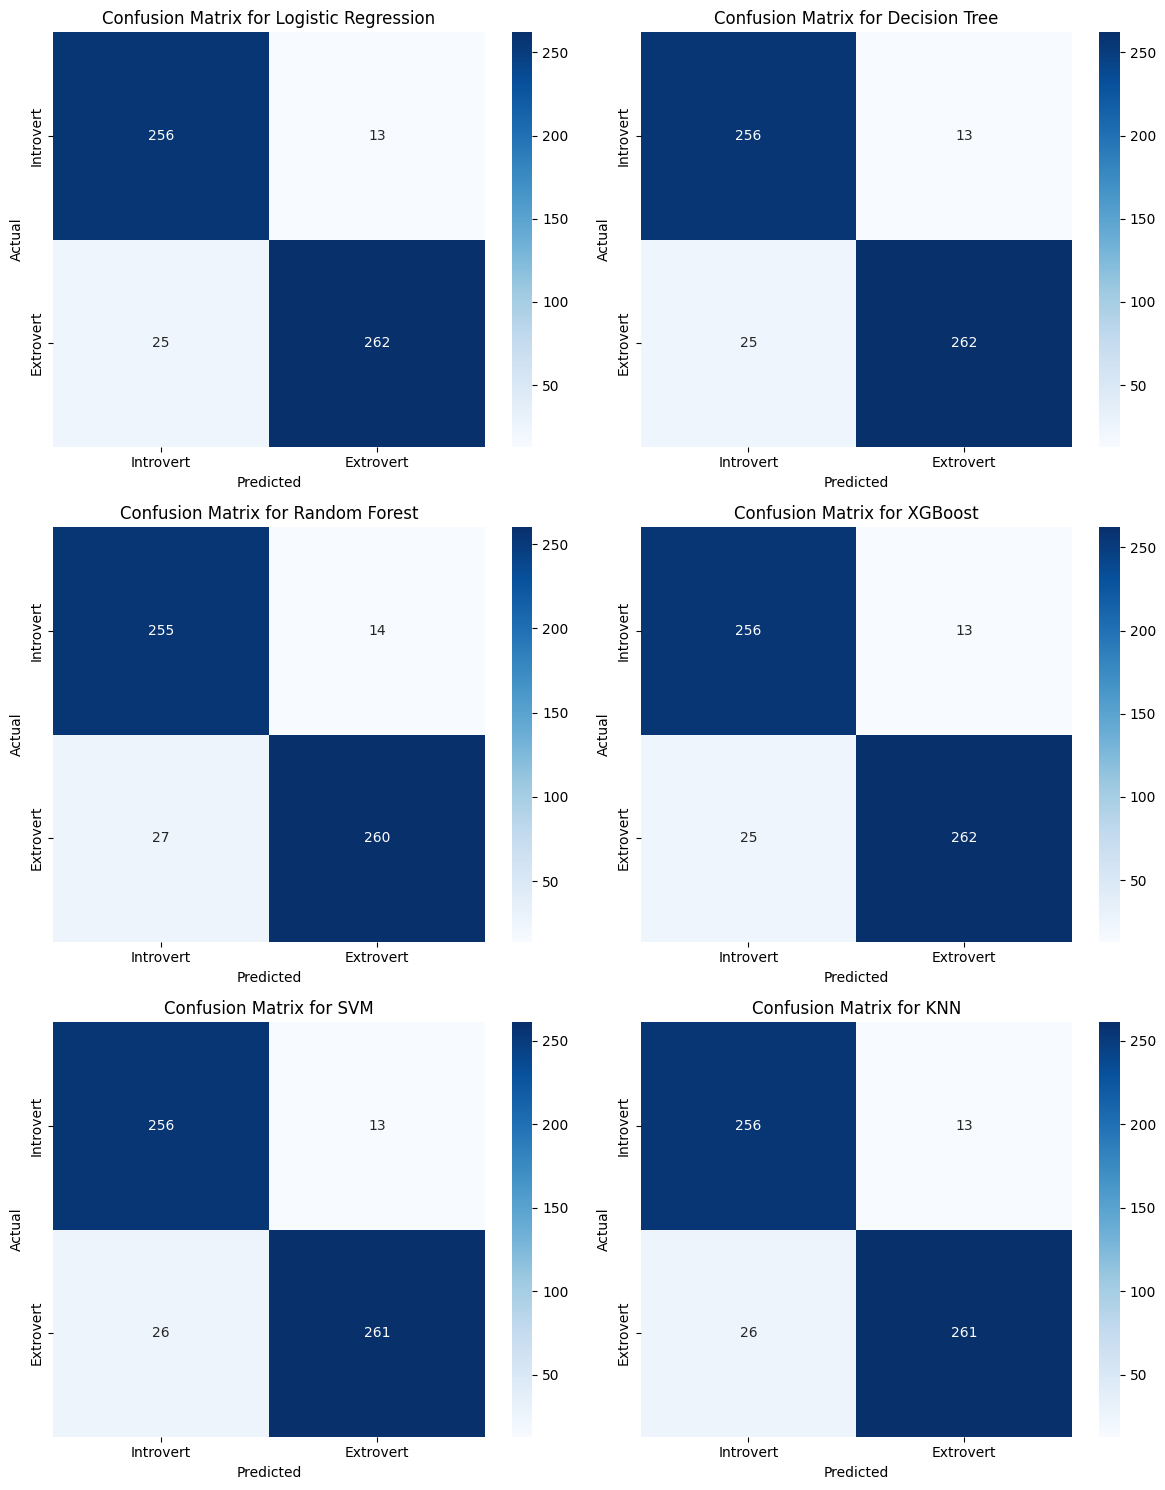

In [123]:
# Print the confusion matrix for all models
plt.figure(figsize=(12, 15))
for i, model in enumerate(best_models):
    model_name = model['model_name']
    y_pred = model['y_pred']
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(3, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

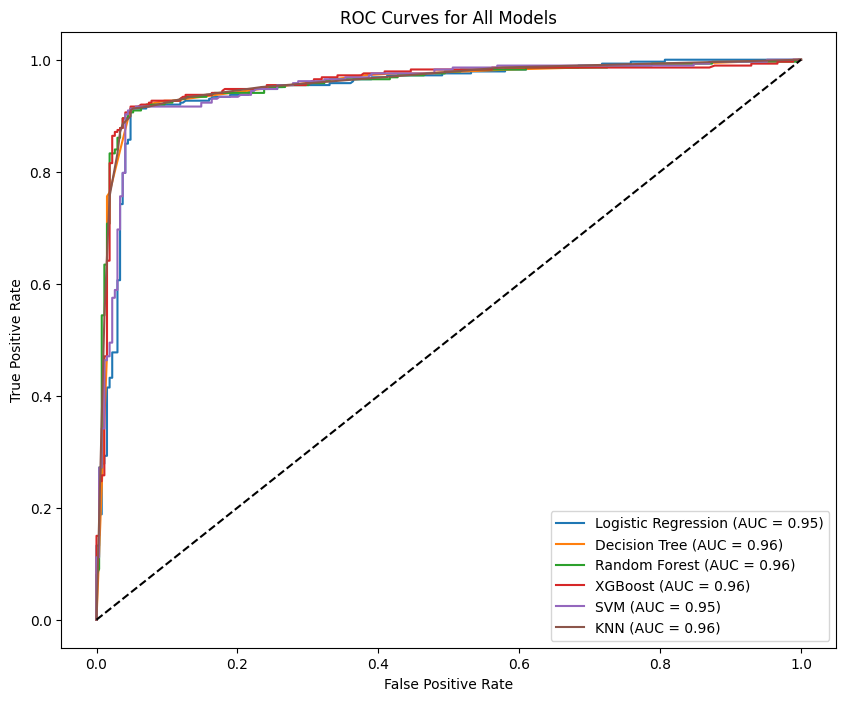

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 8))

for model in best_models:
    model_name = model['model_name']
    best_model = model['best_model']
    
    # Get prediction scores
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)[:, 1]
    else:
        y_score = best_model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

### Feature importance with random forest

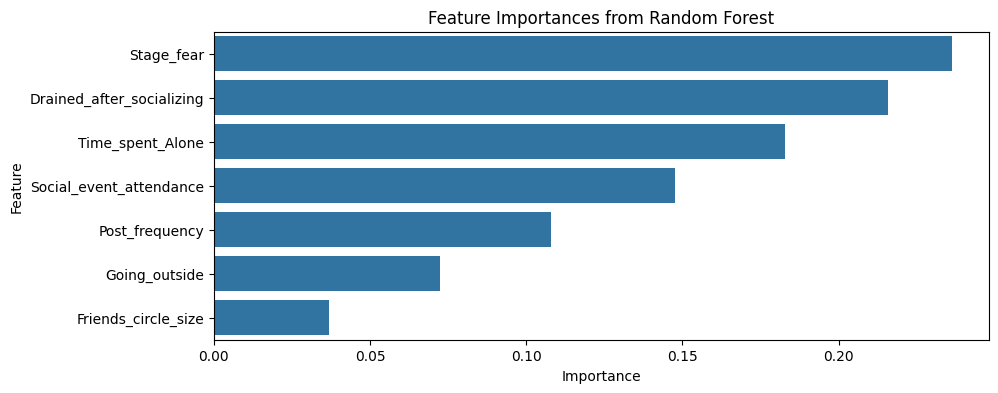

In [132]:
# Random Forest Feature Importance
for model in best_models:
    if model['model_name'] == 'Random Forest':
        rf_model = model['best_model']
        
        # Create a DataFrame for feature importances
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': rf_model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        
        # Plot the feature importances
        plt.figure(figsize=(10, 4))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title('Feature Importances from Random Forest')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()